<a href="https://colab.research.google.com/github/hahaws666/-/blob/main/rotationstrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  6 of 6 completed


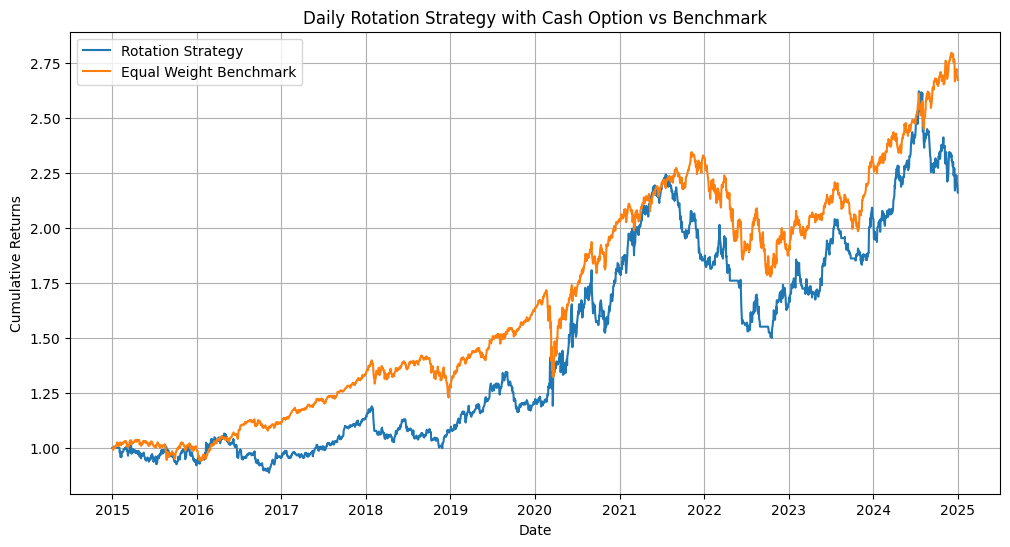

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# 配置资产列表和回测时间段
assets = ['SPY', 'TLT', 'GLD', 'QQQ', 'IWM', 'DIA']
start_date = '2015-01-01'
end_date = '2025-01-01'

# 下载价格数据
data = yf.download(assets, start=start_date, end=end_date)['Adj Close']

# 计算收益率
returns = data.pct_change()

# 定义轮动策略
lookback = 20  # 信号计算窗口期
signal = returns.rolling(window=lookback).mean()

# 每日轮动：选择信号最大的资产或空仓
selected_assets = []
for date, row in signal.iterrows():
    if row.max() > 0:  # 如果信号中有大于0的值，选择最大的
        selected_assets.append(row.idxmax())
    else:  # 否则选择空仓
        selected_assets.append(None)

selected_assets = pd.Series(selected_assets, index=signal.index)

# 将所选资产向后移动一天
selected_assets_shifted = selected_assets.shift(1)

# 计算每日策略收益
strategy_returns = []
for date, asset in zip(returns.index, selected_assets_shifted):
    if asset is not None and pd.notna(asset):
        strategy_returns.append(returns.loc[date, asset])
    else:
        strategy_returns.append(0)  # 空仓收益为0

strategy_returns = pd.Series(strategy_returns, index=returns.index)

# 累计收益
strategy_cum_returns = (1 + strategy_returns).cumprod()
benchmark_cum_returns = (1 + returns.mean(axis=1)).cumprod()

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(strategy_cum_returns, label='Rotation Strategy')
plt.plot(benchmark_cum_returns, label='Equal Weight Benchmark')
plt.title('Daily Rotation Strategy with Cash Option vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In [ ]:
pd.set_option('display.max_rows', None)  # 显示所有行
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 1000)  # 设置显示宽度
pd.set_option('display.colheader_justify', 'left')  # 调整列标题对齐方式

In [ ]:
# 动量信号 + 波动率信号
momentum_signal = returns.rolling(window=50).mean()
volatility_signal = returns.rolling(window=50).std()
combined_signal = momentum_signal / volatility_signal

# 引入多窗口信号
short_term_signal = returns.rolling(window=10).mean()
short_term_signal_volility= returns.rolling(window=10).std()
short_term_signal = short_term_signal / short_term_signal_volility
long_term_signal = returns.rolling(window=150).mean()
long_term_signal_volility = returns.rolling(window=150).std()
long_term_signal = long_term_signal / long_term_signal_volility

In [ ]:
def calculate_strategy_returns(returns, selected_assets, transaction_cost=0.001):
    strategy_returns = []
    previous_asset = None
    for date, asset in zip(returns.index, selected_assets):
        if asset is not None and pd.notna(asset):
            return_value = returns.loc[date, asset]
            strategy_returns.append(return_value)
            previous_asset = asset
        else:
            strategy_returns.append(0)  # 空仓收益为 0
    return pd.Series(strategy_returns, index=returns.index)


simple strategy

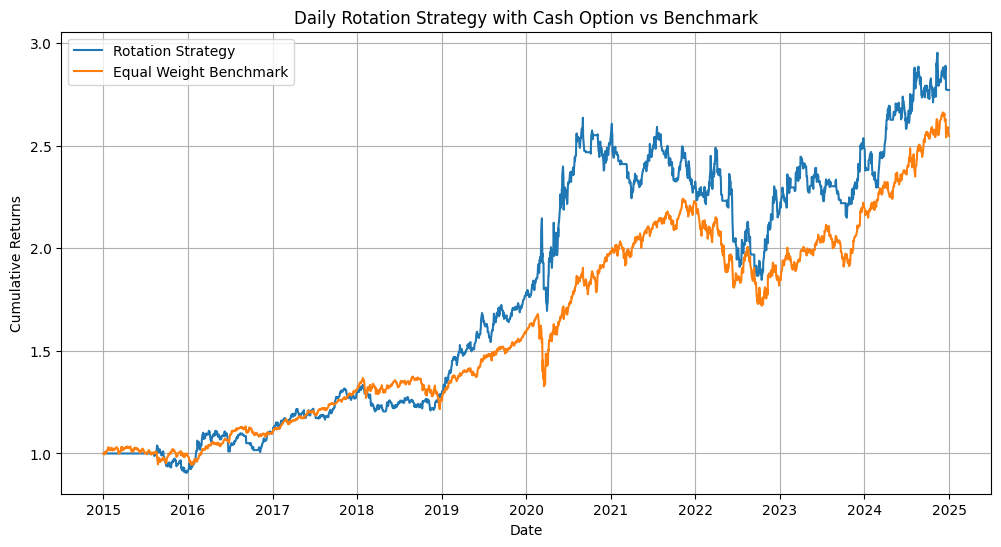

In [ ]:
# 动量信号 + 波动率信号
momentum_signal = returns.rolling(window=20).mean()
volatility_signal = returns.rolling(window=20).std()
combined_signal = momentum_signal / volatility_signal

# 引入多窗口信号
short_term_signal = returns.rolling(window=10).mean()
short_term_signal_volility= short_term_signal.std()
short_term_signal = short_term_signal / short_term_signal_volility
long_term_signal = returns.rolling(window=150).mean()
long_term_signal_volility = long_term_signal.std()
long_term_signal = long_term_signal / long_term_signal_volility

final_signal = 0.8 * combined_signal + 0.3 * short_term_signal - 0.2 * long_term_signal

# 选择资产（考虑空仓逻辑）
selected_assets = []
for date, row in final_signal.iterrows():
    if row.max() > 0:
        selected_assets.append(row.idxmax())
    else:
        selected_assets.append(None)

# 实现动态基准
benchmark_weights = 1 / returns.std()  # 风险平价
benchmark_weights /= benchmark_weights.sum()
benchmark_cum_returns = (1 + (returns * benchmark_weights).sum(axis=1)).cumprod()

selected_assets = pd.Series(selected_assets, index=signal.index)

# 将所选资产向后移动一天
selected_assets_shifted = selected_assets.shift(1)

# 计算每日策略收益
strategy_returns = []
for date, asset in zip(returns.index, selected_assets_shifted):
    if asset is not None and pd.notna(asset):
        strategy_returns.append(returns.loc[date, asset])
    else:
        strategy_returns.append(0)  # 空仓收益为0

strategy_returns = pd.Series(strategy_returns, index=returns.index)

# 累计收益
strategy_cum_returns = (1 + strategy_returns).cumprod()

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(strategy_cum_returns, label='Rotation Strategy')
plt.plot(benchmark_cum_returns, label='Equal Weight Benchmark')
plt.title('Daily Rotation Strategy with Cash Option vs Benchmark')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()



In [ ]:
print(selected_assets)

Date
2015-01-02    None
2015-01-05    None
2015-01-06    None
2015-01-07    None
2015-01-08    None
2015-01-09    None
2015-01-12    None
2015-01-13    None
2015-01-14    None
2015-01-15    None
2015-01-16    None
2015-01-20    None
2015-01-21    None
2015-01-22    None
2015-01-23    None
2015-01-26    None
2015-01-27    None
2015-01-28    None
2015-01-29    None
2015-01-30    None
2015-02-02    None
2015-02-03    None
2015-02-04    None
2015-02-05    None
2015-02-06    None
2015-02-09    None
2015-02-10    None
2015-02-11    None
2015-02-12    None
2015-02-13    None
2015-02-17    None
2015-02-18    None
2015-02-19    None
2015-02-20    None
2015-02-23    None
2015-02-24    None
2015-02-25    None
2015-02-26    None
2015-02-27    None
2015-03-02    None
2015-03-03    None
2015-03-04    None
2015-03-05    None
2015-03-06    None
2015-03-09    None
2015-03-10    None
2015-03-11    None
2015-03-12    None
2015-03-13    None
2015-03-16    None
2015-03-17    None
2015-03-18    None
2015-03

now let's make it harder


In [ ]:
# 初始化参数

initial_learning_rate = 0.5
decay_rate = 0.95  # 学习率衰减因子
decay_type = "step"  # 可选择 "exponential" 或 "step"
epochs = 100
momentum = 0.9
velocity = np.zeros_like(weights)
loss_history = []

In [ ]:
# 计算最大回撤
def calculate_max_drawdown(cumulative_returns):
    """
    计算最大回撤
    :param cumulative_returns: 策略累计收益（pd.Series）
    :return: 最大回撤值（float）
    """
    rolling_max = cumulative_returns.cummax()
    drawdown = (cumulative_returns / rolling_max) - 1
    max_drawdown = drawdown.min()
    return max_drawdown

Epoch 1/100, Loss: -0.000227, Weights: [0.01183334 0.00967902 0.01058477], Learning Rate: 0.500000
Epoch 2/100, Loss: -0.000289, Weights: [0.0134814  0.00903231 0.01122192], Learning Rate: 0.497512
Epoch 3/100, Loss: -0.000308, Weights: [0.01532939 0.00770395 0.01185826], Learning Rate: 0.495050
Epoch 4/100, Loss: -0.000335, Weights: [0.0172422  0.00562447 0.01221453], Learning Rate: 0.492611
Epoch 5/100, Loss: -0.000339, Weights: [0.01922219 0.0030059  0.01227058], Learning Rate: 0.490196
Epoch 6/100, Loss: -0.000297, Weights: [0.0212818  0.00024083 0.01221757], Learning Rate: 0.487805
Epoch 7/100, Loss: -0.000224, Weights: [ 0.02390073 -0.00154742  0.01259433], Learning Rate: 0.485437
Epoch 8/100, Loss: -0.000305, Weights: [ 0.02651742 -0.00289987  0.0128773 ], Learning Rate: 0.483092
Epoch 9/100, Loss: -0.000289, Weights: [ 0.02915598 -0.00378298  0.01317236], Learning Rate: 0.480769
Epoch 10/100, Loss: -0.000349, Weights: [ 0.03157988 -0.00441491  0.01332915], Learning Rate: 0.4784

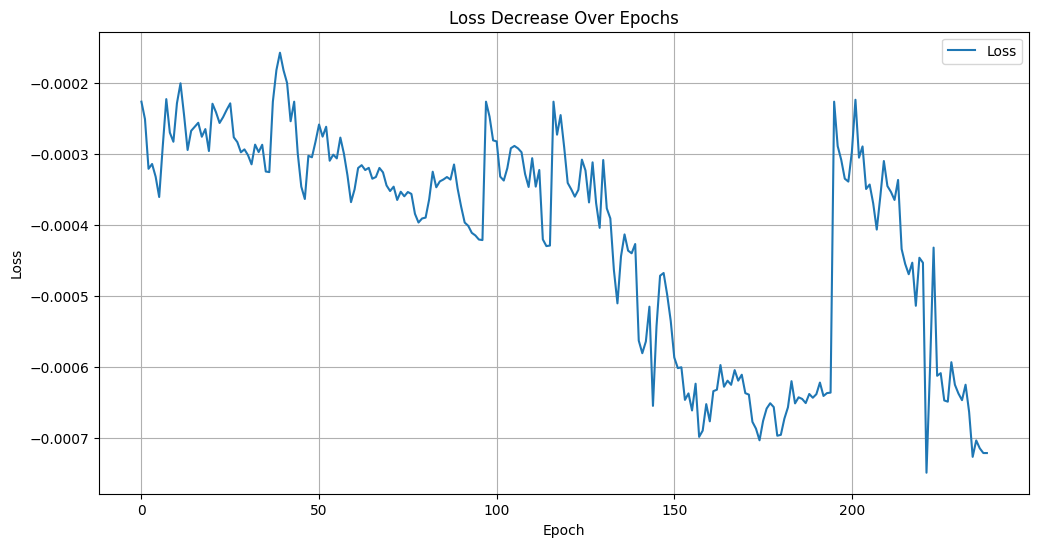

In [ ]:

weights = [0.01,0.01,0.01]
for epoch in range(epochs):
    # 动态调整学习率
    if decay_type == "exponential":
        learning_rate = initial_learning_rate * (decay_rate ** epoch)
    elif decay_type == "step":
        decay_step = 0.01
        learning_rate = initial_learning_rate / (1 + decay_step * (epoch/2))
    else:
        raise ValueError("Unsupported decay type. Choose 'exponential' or 'step'.")

    # 计算最终信号矩阵
    final_signal = (
        weights[0] * combined_signal +
        weights[1] * short_term_signal +
        weights[2] * long_term_signal
    )

    # 选择资产（根据最终信号，考虑空仓逻辑）
    selected_assets = []
    for date, row in final_signal.iterrows():
        # 如果所有信号都小于 0，则空仓
        if (combined_signal.loc[date].max()+
            short_term_signal.loc[date].max()+
            long_term_signal.loc[date].max() < 0):
            selected_assets.append(None)
        # 否则选择信号最大的资产
        elif row.max() > 0:
            selected_assets.append(row.idxmax())
        else:
          selected_assets.append(None)  # 默认空仓
    selected_assets = pd.Series(selected_assets, index=final_signal.index).shift(1)

    # 计算策略收益
    strategy_returns = calculate_strategy_returns(returns, selected_assets, transaction_cost)

    # 损失函数
    loss = -strategy_returns.mean()
    loss_history.append(loss)

    # 计算梯度
    gradients = []
    for i in range(len(weights)):
        perturbed_weights = weights.copy()
        perturbation = 1e-2
        perturbed_weights[i] += perturbation
        perturbed_signal = (
            perturbed_weights[0] * combined_signal +
            perturbed_weights[1] * short_term_signal +
            perturbed_weights[2] * long_term_signal
        )
        perturbed_selected_assets = []
        for date, row in perturbed_signal.iterrows():
            if row.max() > 0:
                perturbed_selected_assets.append(row.idxmax())
            else:
                perturbed_selected_assets.append(None)
        perturbed_selected_assets = pd.Series(perturbed_selected_assets, index=perturbed_signal.index).shift(1)
        perturbed_returns = calculate_strategy_returns(returns, perturbed_selected_assets, transaction_cost)
        perturbed_loss = -perturbed_returns.mean()
        gradients.append((perturbed_loss - loss) / perturbation)

    # 动量优化
    velocity = momentum * velocity + (1 - momentum) * np.array(gradients)
    weights -= learning_rate * velocity

    # 打印训练信息
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}, Weights: {weights}, Learning Rate: {learning_rate:.6f}")

    # 检查停止条件
    if epoch > 1 and abs(loss_history[-1] - loss_history[-2]) < 1e-6:
        print("Loss improvement too small. Stopping early.")
        break

# 绘制损失下降曲线
plt.figure(figsize=(12, 6))
plt.plot(range(len(loss_history)), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Decrease Over Epochs")
plt.grid()
plt.legend()
plt.show()

In [ ]:
print(selected_assets)

Date
2015-01-02    None
2015-01-05    None
2015-01-06    None
2015-01-07    None
2015-01-08    None
2015-01-09    None
2015-01-12    None
2015-01-13    None
2015-01-14    None
2015-01-15    None
2015-01-16    None
2015-01-20    None
2015-01-21    None
2015-01-22    None
2015-01-23    None
2015-01-26    None
2015-01-27    None
2015-01-28    None
2015-01-29    None
2015-01-30    None
2015-02-02    None
2015-02-03    None
2015-02-04    None
2015-02-05    None
2015-02-06    None
2015-02-09    None
2015-02-10    None
2015-02-11    None
2015-02-12    None
2015-02-13    None
2015-02-17    None
2015-02-18    None
2015-02-19    None
2015-02-20    None
2015-02-23    None
2015-02-24    None
2015-02-25    None
2015-02-26    None
2015-02-27    None
2015-03-02    None
2015-03-03    None
2015-03-04    None
2015-03-05    None
2015-03-06    None
2015-03-09    None
2015-03-10    None
2015-03-11    None
2015-03-12    None
2015-03-13    None
2015-03-16    None
2015-03-17    None
2015-03-18    None
2015-03

In [ ]:
print(loss)

-0.00032556905353705494


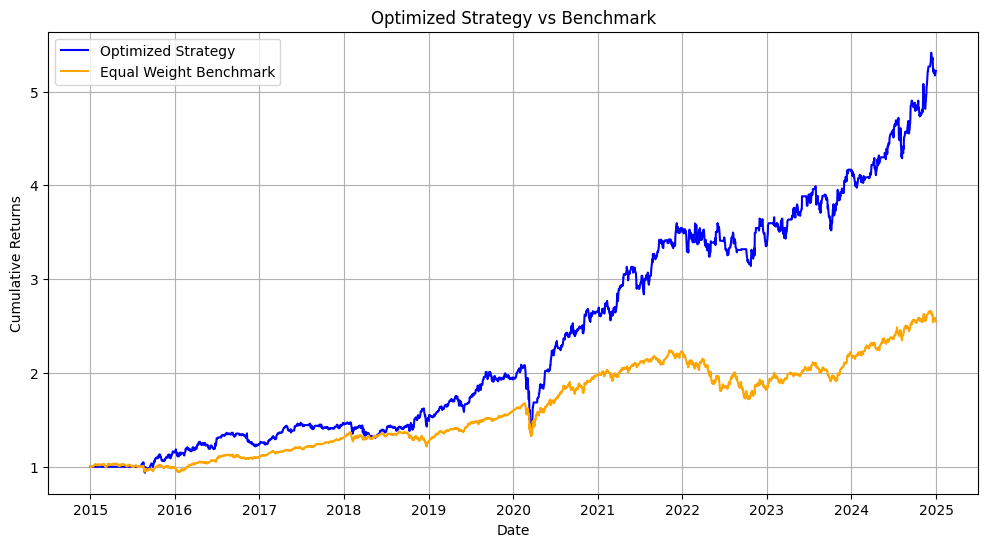

In [ ]:
# 绘制累计收益
strategy_cum_returns = (1 + strategy_returns).cumprod()

# 生成基准收益
benchmark_weights = 1 / returns.std()
benchmark_weights /= benchmark_weights.sum()
benchmark_cum_returns = (1 + (returns * benchmark_weights).sum(axis=1)).cumprod()

# 可视化
plt.figure(figsize=(12, 6))
plt.plot(strategy_cum_returns, label="Optimized Strategy", color="blue")
plt.plot(benchmark_cum_returns, label="Equal Weight Benchmark", color="orange")
plt.title("Optimized Strategy vs Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 计算 Sharpe Ratio
def calculate_sharpe_ratio(strategy_returns, risk_free_rate=0.0, periods_per_year=252):
    """
    计算 Sharpe Ratio

    参数：
    - strategy_returns (pd.Series): 策略每日收益率
    - risk_free_rate (float): 无风险收益率，默认 0
    - periods_per_year (int): 每年的收益率周期，默认为 252（交易日）

    返回：
    - sharpe_ratio (float): 策略的 Sharpe Ratio
    """
    # 年化收益率
    annualized_return = strategy_returns.mean() * periods_per_year
    # 年化波动率
    annualized_volatility = strategy_returns.std() * np.sqrt(periods_per_year)
    # Sharpe Ratio
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    return sharpe_ratio

# 假设 strategy_returns 是每日策略收益率
sharpe_ratio = calculate_sharpe_ratio(strategy_returns)
sharpe_ratio2= calculate_sharpe_ratio(benchmark_cum_returns)

# 输出结果
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sharpe Ratio1: {sharpe_ratio2:.4f}")


Sharpe Ratio: 1.0163
Sharpe Ratio1: 55.4341
